# Advanced Certification Program in Deep Learning
## A program by IISc and TalentSprint
### Assignment 4: Probability and Statistics

## Learning Objectives

At the end of the experiment, you will be able to

* get a broad exposure of the random variables and the way to deal them

* understand the concepts of discrete, continuous random variables

* understand CDF, PMF, PDF

* understand the concepts of probability distributions

* understand Expectation and Moments of random variables

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M1_AST_04_Probability_Statistics_A" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



### Importing required packages

In [ ]:
import scipy                        # Scientific computation library
import numpy as np
import pandas as pd

import seaborn as sns               # Advaced Visualization with high level interface
import math
import matplotlib.pyplot as plt     # Visualization
import scipy.stats as stats

from math import factorial
from scipy import integrate         # Several integration techniques

# Importing various continuos and discrete probability distributions
from scipy.stats import binom, expon, uniform, bernoulli, poisson

sns.set_style('whitegrid')

Distribution is a function that provides the possible values of a variable and how often they occur. The probability distribution is a mathematical function that provides the possibilities of occurrence of the various possible outcomes that can occur in an experiment.

Probability distributions are either continuous probability distributions or discrete probability distributions, depending on whether they define probabilities for continuous or discrete random variables as shown in the figure below.

### Random Variables

Random variable is basically a function which maps from the set of sample space to set of real numbers. The purpose is to get an idea about result of a particular situation where we are given probabilities of different outcomes.

   Formal definition :   $ X: S -> R $

where,  $X$ = random variable, $S$ = set of sample space, $R$ = set of real numbers

To know more about random variables click [here](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm).

There are mainly two types of random variables: discrete and continuous as shown in figure below

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Random_variables.jpg" width=550px/>
</center>



Constructing probability distributions for random variables

### Discrete Random Variable and PMF

A random variable $X$ is said to be discrete if it takes on finite number of values. The probability function associated with it is said to be probability mass function or PMF.
$P(x_i)$ = Probability that $(X = x_i)$ = PMF of $X = p_i$.

* $ 0 ≤ p_i ≤ 1 $
* $ ∑p_i = 1 $ where the sum is taken over all possible values of X

**Exercise 1:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the probability at $X=0$.

In [ ]:
# Creating the dataframe
df1 = pd.DataFrame({'X=0': '?', 'X=1':0.2, 'X=3': 0.3, 'X=4': 0.1}, index= ['P(X=xi)'])
print(df1)

In [ ]:
# For a discrete random variable we know that sum of all P(X=xi) = 1,
# YOUR CODE HERE

**Exercise 2:** Plot the PMF of the discrete random variable X defined as total number of heads while tossing a coin thrice.

In [ ]:
# Our sample space would consist of {HHH, HHT,HTH, THH, TTH, THT, HTT, TTT}
X = [0, 1, 2, 3]   # Number of heads we can get are

P_X0 = # YOUR CODE HERE   # P(X=0)     {TTT}
P_X1 = # YOUR CODE HERE   # P(X=1)     {HTT, THT, TTH}
P_X2 = # YOUR CODE HERE   # P(X=2)     {HHT, HTH, THH}
P_X3 = # YOUR CODE HERE   # P(X=3)     {HHH}
P_Xi = # YOUR CODE HERE

In [ ]:
# Plotting PMF
# YOUR CODE HERE

In [ ]:
# Plotting CDF or cumulative distribution function
# YOUR CODE HERE

For further reference [click here](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

From above plot it can be seen that $ ∑p_i = 1 $.

### Continuous Random Variable and PDF

A random variable $X$ is said to be continuous if it takes on the infinite number of values. The probability function associated with it is said to be PDF or probability density function.

PDF: If $X$ is a continuous random variable.

$ P (x < X < x + dx) = f(x).dx $

* $ f(x) ≥ 0; $ for all $x$
* $ ∫ f(x) dx = 1  $ over all values of $x$

Then $P (X)$ is said to be a PDF of the distribution.

The probability distribution of a continuous random variable $X$ is an assignment of probabilities to intervals of decimal numbers using a function $f(x)$, called a density function, in the following way: the probability that $X$ assumes a value in the interval $(a,b)$ is equal to the area of the region that is bounded above by the graph of the equation $y=f(x)$, bounded below by the $x$-axis, and bounded on the left and right by the vertical lines through $a$ and $b$, as shown in the figure below
![image](https://cdn.iisc.talentsprint.com/CDS/Images/prob_density_function.png)

**Exercise 3:** Compute the value of $P (1 < X < 2)$.
    Such that the density function is given by,

$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &k.x^3&  for\ \  0 ≤ x ≤ 3\\
    &0&   \  otherwise\\
  \end{aligned}
  \right.
\end{equation}
$$

Also, plot the PDF and CDF for random variable $X$.

In [ ]:
# ∫ f(x) dx = 1
# Using the above property we find k,
# ∫ (k*x**3)dx = 1
# k = 1 / ∫ (x**3)dx
k = # YOUR CODE HERE       # integrate  x^3  w.r.t  x from 0 to 3
print('k=', round(k,4))

In [ ]:
# Now the probability density for 1<X<2 is given by,
P = # YOUR CODE HERE

In [ ]:
# Create 100 values within 0 to 3 in order to plot PDF and CDF
# YOUR CODE HERE

In [ ]:
# Plotting PDF
# YOUR CODE HERE

In [ ]:
# Plotting CDF
# YOUR CODE HERE

From above plot it can be seen that $ ∫f(x) dx = 1  $.

### Constructing probability distributions for random variables and Expected value

**Constructing probability distributions for random variables:-**The probability distribution of a discrete random variable  $X$  is a list of each possible value of $X$  together with the probability that  $X$  takes that value in one trial of the experiment.

The probabilities in the probability distribution of a random variable  X  must satisfy the following two conditions:

Each probability  $P(x)$  must be between  0  and  1 :

* $ 0 ≤ P_i ≤ 1 $

The sum of all the possible probabilities is  1 :
* $ ∑P_i = 1 $




**Expected value of a random variable:-** Let  X  be a numerically-valued discrete random variable with sample space  Ω  and distribution function  m(x) . The expected value  E(X)  is defined by provided this sum converges absolutely. It is represented as:


$E(X)=\sum_{x∈Ω}x.m(x)$



**Exercise 4:** The random variable $X$ has a probability function:
\begin{equation}
             \nonumber P(X=x) = \left\{
              \begin{array}{l l}
                k(x+4) & \quad,  x= 0,1,2\\
                k*x & \quad  , x=3,4,5
              \end{array} \right.
            \end{equation}
Find the value of k, construct the probability distribution table and the expected value

In [ ]:
# K(X+4) for x = 0,1,2
lis = []
# YOUR CODE HERE

In [ ]:
df = pd.DataFrame(data)
print(df)

In [ ]:
df["probability_distribution"] = df["values"] * k
print (df["values"])
print(df["probability_distribution"].sum())

In [ ]:
# Creating a new column with the product of the columns of values and probability
# YOUR CODE HERE

# Expected value
# YOUR CODE HERE

### Expected value of a random variable

**Expected value of a random variable:-** Let  X  be a numerically-valued discrete random variable with sample space  Ω  and distribution function  m(x) . The expected value  E(X)  is defined by provided this sum converges absolutely. It is represented as:

$E(X)=\sum_{x∈Ω}x.m(x)$,



**Exercise 5:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the Expected value.

In [ ]:
data = {
  "values": [0, 1, 2, 3, 4, 5],
  "probability_outcomes": [0.15, 0.2, 0.15, 0.25, 0.15, 0.1]
}

df = pd.DataFrame(data) # load data into a DataFrame object

df['expected_value'] = # YOUR CODE HERE # creating a new column with the product of the columns of values and probability
# expected value
# YOUR CODE HERE

### Probability Distributions

**Probability distribution**:- It is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range.
There are many types of Probability distribution,such as:-

*   Uniform Distribution
*   Bernoulli Distribution
*   Binomial Distribution
*   Poisson Distribution
*   Exponential Distribution



### Uniform Distribution

**Uniform Distribution**:- The probability distribution function of the continuous uniform distribution is:
$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &\frac{1}{b-a}&  for\  a≤x≤b\\
    &0&   for\  x<a\ or\ x>b\\
  \end{aligned}
  \right.
\end{equation}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. For a uniform distribution in the interval (a,b), the area needs to be 1 so the height is set to 1/(b−a).


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

**Exercise 6:** Plot the uniform distribution of size 10000 over the range {10,30}.

In [ ]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = # YOUR CODE HERE

In [ ]:
# Ploting the graph
# YOUR CODE HERE

### Bernoulli Distribution

**Bernoulli Distribution**:- A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable *X*, which has a Bernoulli distribution, can take value 1 with the probability of success, *p*, and the value 0 with the probability of failure, *q* or *1−p*. The probabilities of success and failure need not be equally likely. The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (*n*=1). Its probability mass function is given by:

### $f(k,p) = p^{k} (1-p)^{1-k}$

for $k$ in {0,1}, also $ 0≤p≤1$.


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)


**Exercise 3:** Consider a random experiment of tossing a biased coin (having the probability of getting a head as 0.6) once. Plot the distribution associated with the event of getting heads in the given experiment if the process is repeated 10000 times.

In [ ]:
# Generate data
p=0.6                      # probability of getting a head
q=1-p                      # probability of getting a tail

# Creating a data of size 10000 for bernouli distribution
data_bern = # YOUR CODE HERE

In [ ]:
# visualize data
# YOUR CODE HERE

### Binomial Distribution

**Binomial Distribution**:- A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is the same for all the trials is called a binomial distribution. However, the outcomes need not be equally likely, and each trial is independent of the other. The most common example is that of flipping a coin n number of times and calculating the probabilities of getting a particular number of heads. More real-world examples include the number of successful sales calls for a company or whether a drug works for a disease or not.

The parameters of a binomial distribution are *n* and *p* where *n* is the total number of trials, and *p* is the probability of success in each trial. Its probability distribution function is given by :

### $f(k,n,p) = P(X=k) = \begin{pmatrix}
n \\
k
\end{pmatrix} p^k(1-p)^{n-k}$


where :
$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

where, *k* is the number of times the success is achieved and lies in {0, 1,..., n}, also $ 0≤p≤1$.


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)


**Exercise 2:** Consider an event where a fair coin is tossed 10 times and the total number of heads is recorded. Plot the distribution for the event.

In [ ]:
# Generate data
p = 1/2             # probability of getting a head
q = 1-p             # probability of getting a tail
n = 10              # total number of trials
data_binom = # YOUR CODE HERE

In [ ]:
# Visualize data
# YOUR CODE HERE

#### Practical example explaining use case of binomial distribution


 There are 10 sets of traffic lights on the journey.The probability that a driver must stop at any one traffic light coming to airport is 0.25

(a) What is the probability that a driver must stop at exactly 2 of the 10 sets of traffic lights?

(b) What is the probability that a driver will be stopped at 1 or more of the 10 sets of traffic lights?

**(a) What is the probability that a driver must stop at exactly 2 of the 10 sets of traffic lights?**

Here we have to calculate the probablity that particular event happens exactly two times

$$ P(X = 2) = {\binom{10}{2}\cdot(0.25)^2\cdot(1-0.25)^8}.$$

In [ ]:
n = 10   # Number of times experiment runs
p = 0.25 # Probability of outcome(here driver stopping at traffic light)
k = 2    # Number of successful trails(given n trails)

pmf_binomial = # YOUR CODE HERE # Probability mass function for k = 2 i.e. P(X=2)
# YOUR CODE HERE

To understand more about ***stats.binom.pmf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

**(b) What is the probability that a driver will be stopped at 1 or more of the 10 sets of traffic lights?**

Here we have to calculate the probablity that particular event happens one or more times i.e. $ P(X≥1) $ or $ [1- P(X=0)] $

$$ P(X ≥ 1) = 1 - [{\binom{10}{0}\cdot(0.25)^0\cdot(1-0.25)^{10} }].$$

In [ ]:
n = 10   # Number of times experiment runs
p = 0.25 # Probability of outcome(here driver stopping at traffic light)
k = 0    # Number of successful trails(given n trails)

cumbinomial = # YOUR CODE HERE # P(X>=1) or 1-P(X=0)
# YOUR CODE HERE

To understand more about ***stats.binom.cdf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

### Poisson Distribution

**Poisson Distribution**:- Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of as a Poisson process. Poisson distribution is described in terms of the rate at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated as *λ*. Lambda(λ) is the event rate, also called the rate parameter. The probability of observing *k* events in an interval is given by the equation:

$$ P(k\ events\ in\ the\ interval) = \frac{e^{-λ}λ^k}{k!} $$

To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

**Exercise 5:** Plot the poisson distribution having size 10000 and given rate(mean) parameter as 4.

In [ ]:
# Generate data
rate = 4
data_poisson = # YOUR CODE HERE

In [ ]:
# visualize data
# YOUR CODE HERE

#### Practical example for Poisson distribution

The number of work related injuries per month in a manufacturing plant is known to follow a Poisson distribution, with a mean of 2.5 work-related injuries a month.

a) What is the probability that in a given month, no work-related injuries occur?

b) That at least two work- related injury occurs?

**(a) What is the probability that in a given month, no work-related injuries occur?**

Here we have to calculate the probablity that given month has,no work related injuries using probability mass function

$$ P(X = 0) = \frac{(e^{-2.5} * 2.5^{0})} {0!}
 $$
 $$ P(X = 0) = 0.08208 $$

In [ ]:
# Calculate probability using pmf
# YOUR CODE HERE

To understand more about ***stats.poisson.pmf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=stats%20poisson%20cdf)

**b) That at least two work- related injury occurs?**

Here we have to calculate the probablity that given month has,two or more related injuries

$$ P(X >=2 ) = 1 - [P(X <2 ) $$
$$ P(X >=2 ) = 1 - [P(X = 0) +P(X=1)] $$
$$ P(X >=2 ) = 1 - [\frac{(e^{-2.5} * 2.5^{0})} {0!}  +   \frac{(e^{-2.5} * 2.5^{1})} {1!}]
 $$
 $$ P(X >=2 ) = 0.7127025048163542 $$

In [ ]:
# Calculating probability using CDF
cumulative_binomial = # YOUR CODE HERE # P(X>=2) or 1-P(X=0)-P(X=1)
# YOUR CODE HERE

To understand more about ***stats.poisson.cdf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=stats%20poisson%20cdf)

### Exponential Distribution

**Exponential Distribution:-**A continuous random variable $X$ is said to have an exponential distribution with parameter $λ>0$, shown as $X∼Exponential(λ)$, if its PDF is given by \begin{equation}
             \nonumber f_X(x;\mu) = \left\{
              \begin{array}{l l}
                \lambda e^{-\lambda x} & \quad  x > 0\\
                0 & \quad \textrm{otherwise}
              \end{array} \right.
            \end{equation}
To understand more, click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

**Exercise 4:-** Generate Exponential random data and plot it.

In [ ]:
# Generate random normalised data
data_expon = # YOUR CODE HEREs

In [ ]:
# YOUR CODE HERE

### Measures of Central Tendency and Variability

There are three main measures of central tendency: the mode, the median and the mean. Each of these measures describes a different indication of the typical or central value in the distribution.


**Mean**

The mean is the sum of the value of each observation in a dataset divided by the number of observations. This is also known as the arithmetic average.

**Advantage of the mean** : The mean can be used for both continuous and discrete numeric data.

**Limitations of the mean** : The mean cannot be calculated for categorical data, as the values cannot be summed.

As the mean includes every value in the distribution the mean is influenced by outliers and skewed distributions.


**Median**

The median is the middle value in distribution when the values are arranged in ascending or descending order.

The median divides the distribution in half (there are 50% of observations on either side of the median value). In a distribution with an odd number of observations, the median value is the middle value.

**Advantage of the median**: The median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.

**Limitation of the median**: The median cannot be identified for categorical nominal data, as it cannot be logically ordered.


**Mode**

The mode is the most commonly occurring value in a distribution.

**Advantage of the mode**: The mode has an advantage over the median and the mean as it can be found for both numerical and categorical (non-numerical) data.

**Limitations of the mode**: The are some limitations to using the mode. In some distributions, the mode may not reflect the centre of the distribution very well.


 **1.** The retirement age of eleven people are 54, 54, 54, 55, 56, 57, 57, 58, 58, 60, and 60. Find the mean, median and mode for the retirement age.

In [ ]:
retirement_age = [54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60]

The mean is calculated by adding together all the values **(54+54+54+55+56+57+57+58+58+60+60 = 623)** and dividing by the number of observations (11. But here we will directly use mean() method of numpy library.

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

For the above data, the median is the middle value, which is 57 years.

But, when the distribution has an even number of observations, the median value is the mean of the two middle values. Consider the following distribution, the two middle values are 56 and 57, therefore the median equals 56.5 years:

52, 54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60

In [ ]:
# Use the mode() function from the statistics module
# YOUR CODE HERE

The above `stats.mode()` method returns

`mode:` Array of modal values.

`count:` Array of counts for each mode.


The most commonly occurring value is 54, therefore the mode of this distribution is 54 years.

When the distribution of retirement age is ordered from lowest to highest value, it is easy to see that the centre of the distribution is 57 years, but the mode is lower, at 54 years.

54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60

It is also possible for there to be more than one mode for the same distribution of data, (bi-modal, or multi-modal). The presence of more than one mode can limit the ability of the mode in describing the centre or typical value of the distribution because a single value to describe the centre cannot be identified.

In some cases, particularly where the data are continuous, the distribution may have no mode at all (i.e. if all values are different).

In cases such as these, it may be better to consider using the median or mean, or group the data in to appropriate intervals, and find the modal class.


**How do outliers influence the measures of central tendency?**

**Outliers are extreme, or atypical data value(s) that are notably different from the rest of the data.**

It is important to detect outliers within a distribution, because they can alter the results of the data analysis. The mean is more sensitive to the existence of outliers than the median or mode.

Consider the initial retirement age dataset again, with one difference; the last observation of 60 years has been replaced with a retirement age of 81 years. This value is much higher than the other values, and could be considered an outlier. However, it has not changed the middle of the distribution, and therefore the median value is still 57 years.

54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 81

As the all values are included in the calculation of the mean, the outlier will influence the mean value.

(54+54+54+55+56+57+57+58+58+60+81 = 644), divided by 11 = 58.5 years

In this distribution the outlier value has increased the mean value.

Despite the existence of outliers in a distribution, the mean can still be an appropriate measure of central tendency, especially if the rest of the data is normally distributed. If the outlier is confirmed as a valid extreme value, it should not be removed from the dataset. Several common regression techniques can help reduce the influence of outliers on the mean value.

### Expectation and Moments of Random Variables

**Expectation:** The expected value of a random variable $X$, which is denoted $E(X)$, is a generalization of the weighted average. The expectation or expected value of a random variable is a single number and it tells us a lot about the behavior of the variable. In simple terms, the expectation is the average value of the random variable where each value is weighted according to its probability.

For a discrete random variable that can take $n$ outcomes like $x_1, x_2, x_3, ..., x_n$ with probabilities $p_1, p_2, p_3,..., p_n$, the expectation is given by,

$E(X) = \Sigma_{i=1}^{n}p_i.x_i$

For a continuous random variable we use integration in place of summation. The formula to remember is,

$ E(X) = \int_{x_{min}}^{x_{max}} x.f(x) \,dx $

Here $f(x)$ is the probability density function.

Let us now check a simple python code for finding the expectation of a given discrete random variable. The random variable can take values of $\{1, 4, 3\}$ and have probabilities $\{0.1, 0.5, 0.4\}$.


In [ ]:
# A simple function to calculate expectation in python. The function works for discrete random variables only.

def expectation(outcomes, probs):
    # YOUR CODE HERE
    return e

# Let us define x and p's.
x = [1, 4, 3]
p = [0.1, 0.5, 0.4]

print ("Expectation of the given random experiment is: ", expectation(x, p))

**Moment:** In general, moment of a function are quantitative measures that depicts the shape of the function's graph. In a probability distribution, the first moment is the expectation (described above), the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis, etc. The general formula for a $k^{th}$ moment in ``scipy`` is,

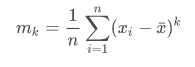

Here $n$ are the number of discrete examples and $\overline{x}$ is the mean of the examples.

To summarize moments,
* 1st moment: expectation
* 2nd moment: variance
* 3rd moment: Skew

We will conduct an experiment based on this information. First, we will sample 10,000 points from a normal distribution of know $\mu$ and $\sigma$. We will then use the function to calculate moments. Ideally, the 1st and 2nd moments should match those of $\mu$ and $\sigma$ respectively.

In [ ]:
# Declaring mu and sigma according to our choice
mu = 10
standard_dev = 5

# 10000 points are sampled from the normal distribution with given mu and sigma.
data_normal = # YOUR CODE HERE

# YOUR CODE HERE

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. In a hospital, research show that of patients suffering from a certain illness, 75% die of it. What is the probability that of 6 randomly selected patients, at least one will recover? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","0.822", "0.355", "0.2966", "0.004395"]

In [ ]:
#@title Q.2. If X is a continuous random variable with pdf f(x), then what is the relationship between Variance and the Expected value of X? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","E[X]**2 - E[X**2]", "E[X**2] - E[X]**2", "E[X**2] - XE[X]", "None of the above"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")